# Image Processing in OpenCV  Part2
## Contours in OpenCV
### What are countours?
A contour is  a curve or a line joining all the continuous points having same value.  
Binary images are used to detect contours accurately. Therefore, an image is preprocessed by thresholding or canny edge detection.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('inputs/messi5.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

`cv2.findContours()` need three arguments: input image, how to retrieve contour, and how to detect contours.

### The way to draw contours
`cv2.drawContours()` is used with arguments: (input image, contours: List, contour index, color, thickness)

In [5]:
img = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)  #  depict all contours when index=-1

cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)  # only fourth contour

### Contour approximation
Third argument of `cv2.findContours()` is ContourApproximationModes. `cv2.CHAIN_APPROX_SIMPLE` compress the information of vertices e.g. the points of rectangle is saved 4 poins, while `cv2.CHAIN_APPROX_NONE` save all points on the contour.

### Contour features
#### moment
`cv2.moment()` calculates various moment.  
Centroid can be calculated.

In [8]:
img = cv2.imread('inputs/star.png', 0)
ret, thresh = cv2.threshold(img, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
moment = cv2.moments(cnt)

cx = int(moment['m10'] / moment['m00'])
cy = int(moment['m01'] / moment['m00'])
print(cx, cy)

111 111


#### Contour area

In [10]:
area = cv2.contourArea(cnt)
print(area)

7084.0


#### arc length

In [12]:
perimeter = cv2.arcLength(cnt, True)  # second argument is a flag whether the contour is closed.
print(perimeter)

718.4751765727997


#### contour approximation

In [ ]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

`epsilon` denotes the accuracy of approximation, which means the max distance between real contour and approximated contour.

#### Convex hull
`cv2.convexHull()` checks convexity of contour and corrects it.  
Optional argument `clockwise` denotes the flag whether it outputs convex hull clockwise or counter-clockwise.  
Optional argument `returnPoints` is `True` by default, it returns the indices of contour if `False`. 

In [18]:
hull = cv2.convexHull(cnt)

#### Checking convexity

In [20]:
isConvexity = cv2.isContourConvex(cnt)
print(isConvexity)

False


#### Bounding rectangle

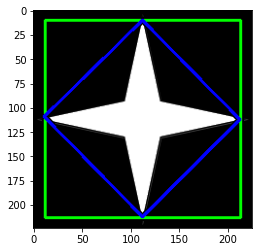

In [32]:
out = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
out[:, :, :] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# Straight
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(out, (x, y), (x+w, y+h), (0, 255, 0), 2)

# rotated
rect = cv2.minAreaRect(cnt)  # returns (center x, center y), (width, height), angle
box = cv2.boxPoints(rect)  # 
box = np.int0(box)
cv2.drawContours(out, [box], 0, (0, 0, 255), 2)

plt.imshow(out)
plt.show()

#### Minimum enclosing circle

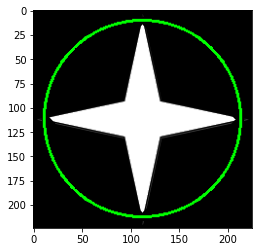

In [33]:
out = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
out[:, :, :] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(out, center, radius, (0, 255, 0), 2)

plt.imshow(out)
plt.show()

#### Fitting a ellipse

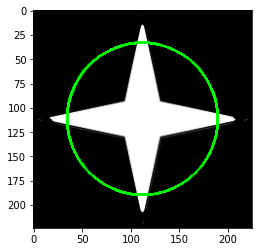

In [35]:
out = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
out[:, :, :] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(out, ellipse, (0, 255, 0), 2)

plt.imshow(out)
plt.show()

#### Fitting a line

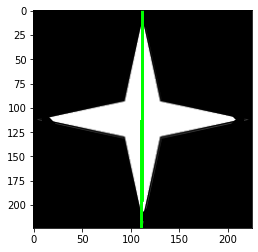

In [37]:
out = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
out[:, :, :] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

rows, cols = img.shape
[vx, vy, x, y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(out, (cols-1, righty), (0, lefty), (0,255,0),2)

plt.imshow(out)
plt.show()

### Contour properties

#### aspect ratio

In [39]:
x, y, w, h = cv2.boundingRect(cnt)
aspect_ratio = float(w) / h
print(aspect_ratio)

0.9901477832512315


#### Extent
extent = object area / bounding rectangle area

In [42]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print(extent)

0.17361468519471607


#### Solidity
solidity = contour area / convex hull area

In [44]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area) / hull_area
print(solidity)

0.35069306930693067


#### Equivalent diameter
equivalent diameter = √(4 x contour area / π)

In [45]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area / np.pi)
print(equi_diameter)

94.97172702917375


#### Orientation

In [47]:
(x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(cnt)
print(angle)

175.45335388183594


In [49]:
#### Mask and pixel points
mask = np.zeros(img.shape, np.uint8)
cv2.drawContours(mask, [cnt], 0, 255, -1)
pixelpoints = np.transpose(np.nonzero(mask))
print(pixelpoints[:10, :])

[[ 10 112]
 [ 11 112]
 [ 12 112]
 [ 13 112]
 [ 14 111]
 [ 14 112]
 [ 14 113]
 [ 15 111]
 [ 15 112]
 [ 15 113]]


#### Maximum value, minimum value and their locations

In [52]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img, mask=mask)
print(min_val, min_loc)
print(max_val, max_loc)

0.0 (112, 10)
255.0 (112, 15)


#### mean value

In [54]:
mean_val = cv2.mean(img, mask=mask)
print(mean_val)

(251.35271108713243, 0.0, 0.0, 0.0)


#### Corner

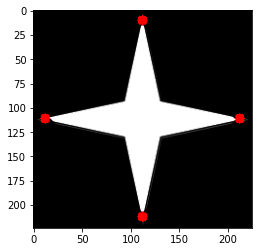

In [58]:
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

out = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
out[:, :, :] = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
cv2.circle(out, leftmost, 5, (255, 0, 0), -1)
cv2.circle(out, rightmost, 5, (255, 0, 0), -1)
cv2.circle(out, topmost, 5, (255, 0, 0), -1)
cv2.circle(out, bottommost, 5, (255, 0, 0), -1)

plt.imshow(out)
plt.show()

### More functions about contours
#### Convexity defects
`cv2.convexityDefects()` returns (start index, end index, furthest index, distance)

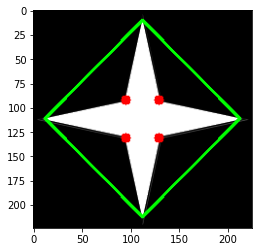

In [64]:
img = cv2.imread('inputs/star.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 1)
cnt = contours[0]

hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull)

for i in range(defects.shape[0]):
    start, end, far, distance = defects[i, 0]
    start = tuple(cnt[start][0])  # start, end, far is index of cnt
    end = tuple(cnt[end][0])
    far = tuple(cnt[far][0])
    
    cv2.line(img, start, end, [0, 255, 0], 2)
    cv2.circle(img, far, 5, [255, 0, 0], -1)
    
plt.imshow(img)
plt.show()

#### Point polygon test
`cv2.pointPolygonTest(contour, point, measureDist)` returns minimum distance between a point and a contour.  
If the point is inside the contour, return positive value, outside returns negative value.  
Third arugment returns signed distnce if `True`.

In [66]:
dist = cv2.pointPolygonTest(cnt, (50, 50), True)
print(dist)

-51.66236541235796


#### Shape matching

0.26282854230654173


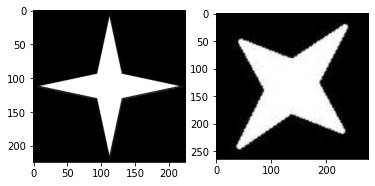

In [73]:
img1 = cv2.imread('inputs/star.png', 0)
img2 = cv2.imread('inputs/star2.png', 0)

_, thresh1 = cv2.threshold(img1, 127, 255, 0)
_, thresh2 = cv2.threshold(img2, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh1, 2, 1)
cnt1 = contours[0]
contours, hierarchy = cv2.findContours(thresh2, 2, 1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
print(ret)

plt.subplot(121)
plt.imshow(img1, "gray")
plt.subplot(122)
plt.imshow(img2, "gray")
plt.show()

#### Assignment
Implement signed distance field, inside red and outside blue.

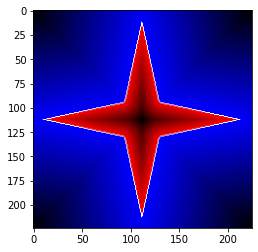

In [84]:
img = cv2.imread('inputs/star.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 2, 1)
cnt = contours[0]

out = np.zeros(img.shape, np.uint8)
sdf = np.zeros(img_gray.shape, np.float32)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        sdf[i, j] = cv2.pointPolygonTest(cnt, (i, j), True)

min_dis = sdf.min()
max_dis = sdf.max()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if sdf[i, j] == 0:
            out[i, j, :] = np.array([255, 255, 255], np.uint8)
        elif sdf[i, j] > 0:
            out[i, j, :] = np.array([255 - (sdf[i, j] * 255 / max_dis), 0, 0], np.uint8)
        else:
            out[i, j, :] = np.array([0,0,255 -  (sdf[i, j] * 255 / min_dis)], np.uint8)
            
plt.imshow(out)
plt.show()

Compare images of digits or letters using `cv2.matchShapes()`

2.220446049250313e-16


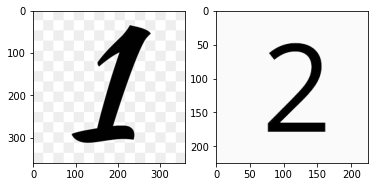

In [85]:
img1 = cv2.imread('inputs/1.jpeg', 0)
img2 = cv2.imread('inputs/2.png', 0)

_, thresh1 = cv2.threshold(img1, 127, 255, 0)
_, thresh2 = cv2.threshold(img2, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh1, 2, 1)
cnt1 = contours[0]
contours, hierarchy = cv2.findContours(thresh2, 2, 1)
cnt2 = contours[0]

ret = cv2.matchShapes(cnt1, cnt2, 1, 0.0)
print(ret)

plt.subplot(121)
plt.imshow(img1, "gray")
plt.subplot(122)
plt.imshow(img2, "gray")
plt.show()

### Hierarchy of contours
Opencv represents hierarchy of contour as [Next, Previous, First_Child, Prent]  
Contour retrieval mode is specified in third argument of `cv2.findContour()`.  
- cv2.RETR_LIST
    - no parent-child relationship
- cv2.RETR_EXTERNAL
    - extract only most external contour
- cv2.RETR_CCOMP
    - create 2-level hierarchy 
- cv2.RETR_TREE
    - create all-level hierarchy

## Histograms in OpenCV
### Histogram calculation

In [86]:
img = cv2.imread('inputs/home.jpeg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

`cv2.calcHist(images, channels, mask, histSize, ranges)` calculates histogram.

In [87]:
hist2, bins = np.histogram(img.ravel(), 256, [0, 256])

`np.histogram()` also calculates histogram but OpenCV functions are faster than those of NumPy.

### Plotting histogram

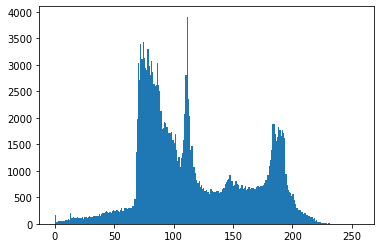

In [91]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

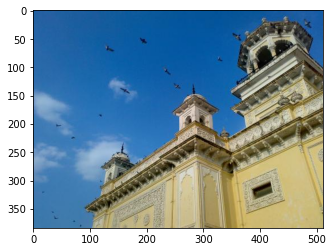

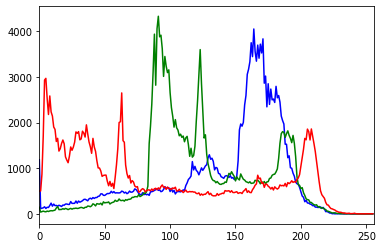

In [97]:
img = cv2.imread('inputs/home.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
plt.xlim([0, 256])
plt.show()

### Application of mask

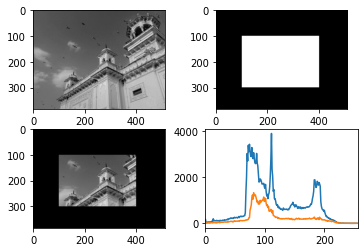

In [102]:
img = cv2.imread('inputs/home.jpeg', 0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask=mask)

hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])
plt.show()

### histogram equalization

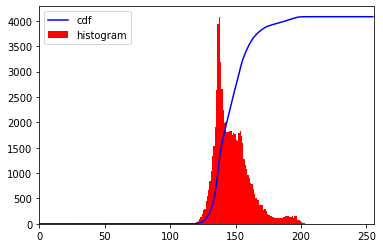

In [120]:
img = cv2.imread('inputs/wiki.jpeg', 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()  # histogram lies in brighter region.

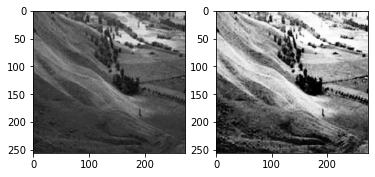

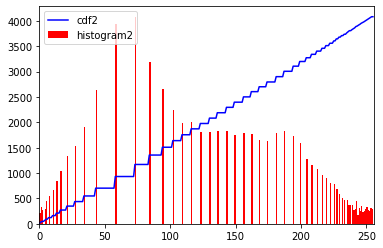

In [121]:
cdf_m = np.ma.masked_equal(cdf, 0)  # value 0 is masked
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf2 = np.ma.filled(cdf_m, 0).astype(np.uint8)

img2 = cdf2[img]

plt.subplot(121), plt.imshow(img, "gray")
plt.subplot(122), plt.imshow(img2, "gray"), plt.show()

hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])

cdf2 = hist2.cumsum()
cdf2_normalized = cdf2 * hist2.max() / cdf2.max()

plt.plot(cdf2_normalized, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf2', 'histogram2'), loc='upper left')
plt.show()  # histogram lies in brighter region.

OpenCV also has a function `cv2.equalizeHist()` for histogram equalization.

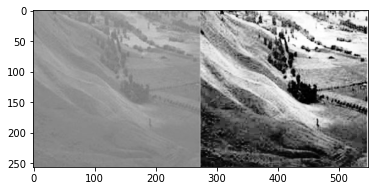

In [122]:
img = cv2.imread('inputs/wiki.jpeg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))

plt.imshow(res, "gray")
plt.show()

### Contrast limited adaptive histogram equalization
Sometimes the above method doesn't work well.  
It is caused if the histogram isn't confined to a particular region.  
`cv2.createCLAHE()` divides an image into small blocks and each of blocks are histogram equalized.  
So as not to amplify noises, contrast limiting is applied.

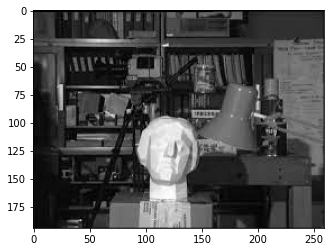

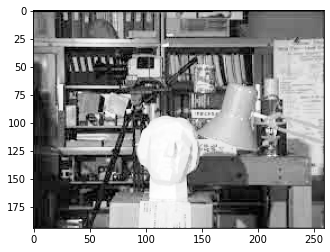

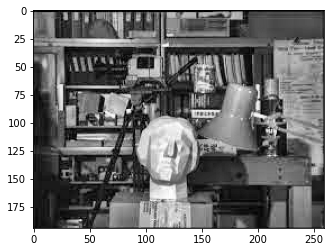

In [131]:
img = cv2.imread('inputs/tsukuba.jpeg', 0)

# Global equalization
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype(np.uint8)
img2 = cdf[img]

# Adaptive equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

plt.imshow(img, "gray")
plt.show()
plt.imshow(img2, "gray")
plt.show()
plt.imshow(cl1, "gray")
plt.show()

### 2d histogram
channels, bins, ranges are increased according to the number of dimension.

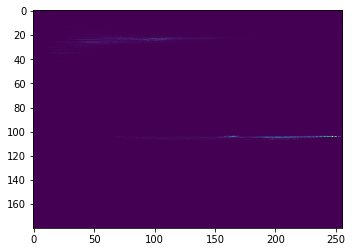

In [137]:
img = cv2.imread('inputs/home.jpeg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# OpenCV
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# NumPy
hist2, xbins, ybins = np.histogram2d(hsv[:, :, 0].ravel(), hsv[:, :, 1].ravel(), [180, 256], [[0, 180], [0, 256]])

plt.imshow(hist, interpolation='nearest')
plt.show()

Horizontal axis shows S values and vertical axis shows H.  
Around H=100 and S=200 are high values. It corresponds to blue sky.

### Backprojection of histogram
In an output image, the region similar to target object is more white, else black.

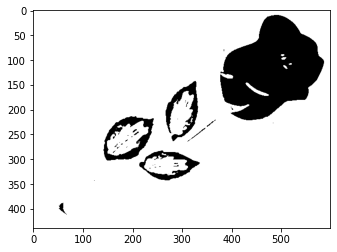

In [143]:
# NumPy
roi = cv2.imread('inputs/rose_red.jpeg')
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

target = cv2.imread('inputs/rose_red.png')
target_hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
target_hist = cv2.calcHist([target_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
ratio = cv2.divide(roi_hist, target_hist)

hue, saturation, value = cv2.split(target_hsv)
backproj = ratio[hue.ravel(), saturation.ravel()]
backproj = np.minimum(backproj, 1)
backproj = backproj.reshape(target_hsv.shape[:2])

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(backproj, -1, disc, backproj)
backproj = np.uint8(backproj)
cv2.normalize(backproj, backproj, 0, 255, cv2.NORM_MINMAX)

_, thresh = cv2.threshold(backproj, 50, 255, 0)

plt.imshow(thresh, "gray")
plt.show()

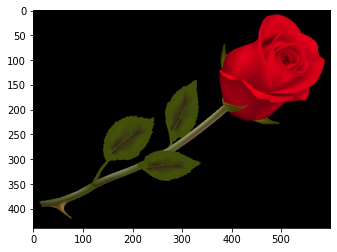

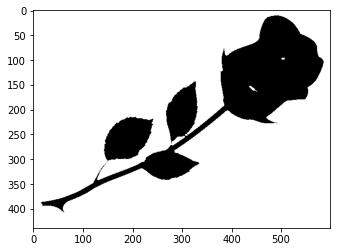

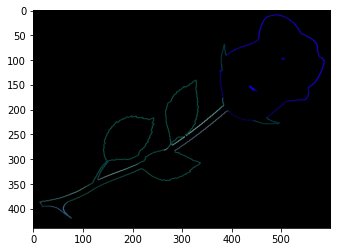

In [148]:
# OpenCV
roi = cv2.imread('inputs/rose_red.jpeg')
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

target = cv2.imread('inputs/rose_red.png')
target_hsv = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([target_hsv], [0, 1], roi_hist, [0, 180, 0, 256], 1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(dst, -1, disc, dst)

_, thresh = cv2.threshold(dst, 50, 255, 0)
thresh = cv2.merge((thresh, thresh, thresh))
res = cv2.bitwise_and(target, thresh)

plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(thresh, "gray")
plt.show()
plt.imshow(res, "gray")
plt.show()

## Fourier Transform
### Fourier transform in NumPy

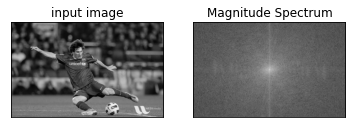

In [11]:
img = cv2.imread('inputs/messi5.jpg', 0)
freq_img = np.fft.fft2(img)
fshift = np.fft.fftshift(freq_img)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, "gray")
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, "gray")
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

Center of right image is white, which means the input image includes a lot of low-frequency components.

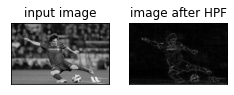

In [12]:
rows, cols = img.shape
rows_half, cols_half = rows // 2, cols // 2

# high pass filter
fshift[rows_half-30:rows_half+30, cols_half-30:cols_half+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131), plt.imshow(img, "gray")
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, "gray")
plt.title("image after HPF"), plt.xticks([]), plt.yticks([])
plt.show()

High pass filter can detect the edge of the image.
### Fourier transform in OpenCV

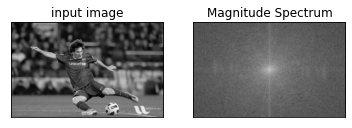

In [13]:
img = cv2.imread('inputs/messi5.jpg', 0)
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, "gray")
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, "gray")
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

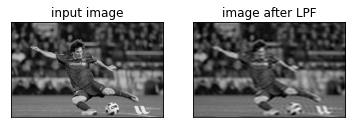

In [14]:
rows, cols = img.shape
rows_half, cols_half = rows // 2, cols // 2

mask = np.zeros((rows, cols, 2), np.uint8)
mask[rows_half-30:rows_half+30, cols_half-30:cols_half+30] = 1

# low pass filter
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, "gray")
plt.title('input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, "gray")
plt.title("image after LPF"), plt.xticks([]), plt.yticks([])
plt.show()

### Performance optimization of DFT
DFT performed faster when the size of array is power of two. It also processes faster when the size is a product of 2, 3, 5.  
`cv2.getOptimalDFTSize()` returns optimized array size.

In [16]:
img = cv2.imread('inputs/messi5.jpg', 0)
print(img.shape[0], img.shape[1])  #  342 548

optimal_rows = cv2.getOptimalDFTSize(img.shape[0])
optimal_cols = cv2.getOptimalDFTSize(img.shape[1])
print(optimal_rows, optimal_cols)  # 360 576

342 548
360 576


In [17]:
# zero padding
optimal_img = np.zeros((optimal_rows, optimal_cols))
optimal_img[:rows, :cols] = img

# another method
right = optimal_cols - cols
bottom = optimal_rows - rows
optimal_img2 = cv2.copyMakeBorder(img, 0, bottom, 0, right, cv2.BORDER_CONSTANT, value=0)

In [18]:
%timeit fft1 = np.fft.fft2(img)

11.1 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%timeit fft2 = np.fft.fft2(img, [optimal_rows, optimal_cols])

4.62 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit dft1 = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

1.91 ms ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
%timeit dft2 = cv2.dft(np.float32(optimal_img2), flags=cv2.DFT_COMPLEX_OUTPUT)

1.08 ms ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Why laplacian is high pass filter?

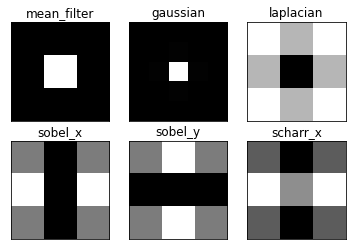

In [23]:
mean_filter = np.ones((3, 3))

gau = cv2.getGaussianKernel(5, 10)
gaussian = gau * gau.T

laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

scharr_x = np.array([[-3, 10, 3], [-10, 0, 10], [-3, 10, 3]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr_x]
filter_name = ['mean_filter', 'gaussian', 'laplacian', 'sobel_x', 'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(x) for x in fft_filters]
mag_spectrum = [np.log(np.abs(x)+1) for x in fft_shift]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(mag_spectrum[i], "gray")
    plt.title(filter_name[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## Template Matching

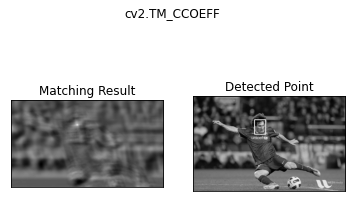

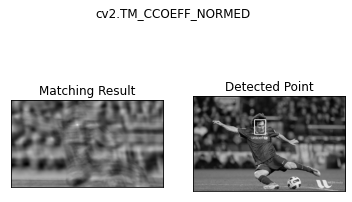

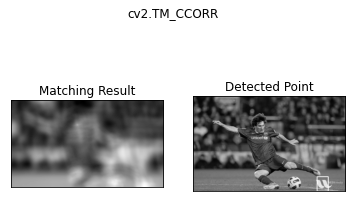

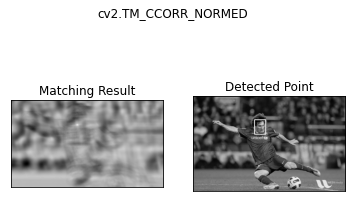

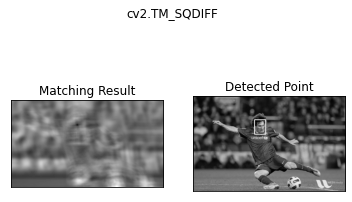

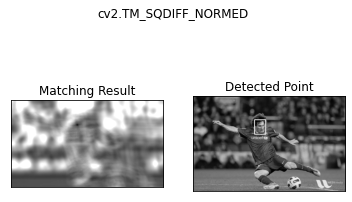

In [5]:
img = cv2.imread('inputs/messi5.jpg', 0)
img2 = img.copy()
template = cv2.imread('inputs/messi_face.jpeg', 0)

width, height = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 
                     'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(img, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res, cmap="gray")
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap="gray")
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

Each method calculates correlation between the image and the template like [this](https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d).  

SQDIFF: square difference, CCORR: cross correlation CCOEFF: correlation coefficient  
Above result shows 'cv2.TM_CCORR' didn't work well.

### Template matching with mulitple objects

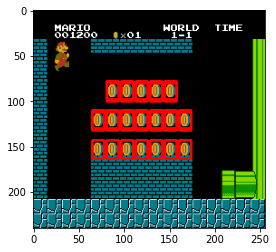

In [14]:
img_bgr = cv2.imread('inputs/mario.png')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
template = cv2.imread('inputs/mario_coin.png', 0)
width, height = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + width, pt[1] + height), (0, 0, 255), 2)
    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Hough line transform

### theory
The hough transform is a general method to detect shapes which is represented in a mathematic form.  
A line is represented with two parameters (ρ, θ): ρ = x cos θ + y sin θ  
You prepare a matrix whose column denotes ρ, row denotes θ. The larger the size of matrix you prepare, the more precise shape is detected.

### Hough transform in OpenCV
`cv2.HoughLines(img, ρ, θ, threshold)` can be used in OpenCV. $\rho $ and $\theta$ means the resoluton.

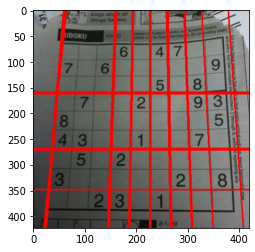

In [28]:
img = cv2.imread('inputs/dave.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for rho, theta in lines[:, 0, :]:
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    x0 = cos_theta * rho
    y0 = sin_theta * rho
    x1 = int(x0 + 1000 * (-sin_theta))
    y1 = int(y0 + 1000 * cos_theta)
    x2 = int(x0 - 1000 * (-sin_theta))
    y2 = int(y0 - 1000 * cos_theta)
    
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Probablilistic Hough transform
This method takes only a random set of points enough to line detection.

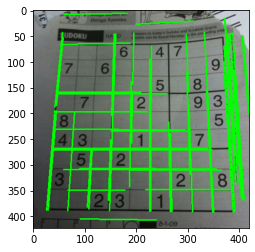

In [33]:
img = cv2.imread('inputs/dave.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

minLineLength = 100
maxLineGap = 10

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=minLineLength, maxLineGap=maxLineGap)
for x1, y1, x2, y2 in lines[:, 0, :]:
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### Hough circle transform
A circle needs three parameter $(x_c, y_c, r)$ to represent equation: $(x - x_c)^2 + (y - y_c)^2 = r^2$  
It is ineffective to use 3D accumulator so OpenCV use "Hough gradient method" to detect.

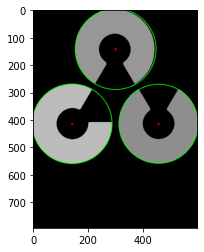

In [36]:
img = cv2.imread('inputs/opencv-logo.png', 0)
img = cv2.medianBlur(img, 5)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, 
                                               minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    cv2.circle(color_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(color_img, (i[0], i[1]), 2, (0, 0, 255), 3)
    
out = cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB)
plt.imshow(out)
plt.show()

## Image Segmentation with Watershed Algorithm

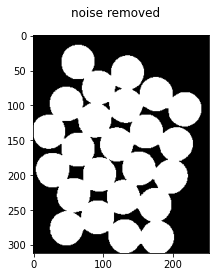

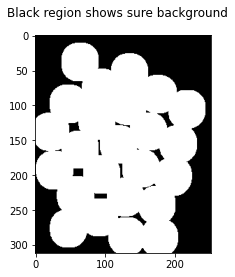

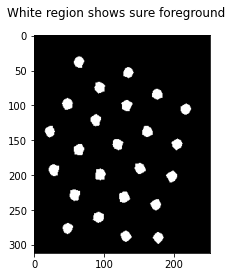

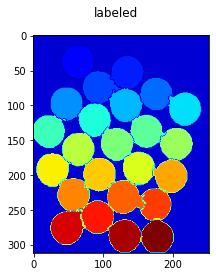

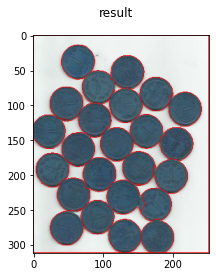

In [51]:
img = cv2.imread('inputs/coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# remove noise by opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# find sure background area by dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# find sure foreground area by distance transform
# Erosion can't be used because each object touches each other
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# mark labels: sure background=1, unknown=0, sure foreground has different value more 1
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0

# watershed algorithm returns border as -1
markers = cv2.watershed(img, markers)
img[markers==-1] = [255, 0, 0]

plt.suptitle("noise removed")
plt.imshow(opening,"gray")
plt.show()
plt.suptitle("Black region shows sure background")
plt.imshow(sure_bg,"gray")
plt.show()
plt.suptitle("White region shows sure foreground")
plt.imshow(sure_fg,"gray")
plt.show()
plt.suptitle("labeled")
plt.imshow(markers, "jet")
plt.show()
plt.suptitle("result")
plt.imshow(img)
plt.show()

## Interactive foreground extraction using GrabCut Algorithm

GrabCut algorithm output segmented image and user draw lines where faulty are. Machine iteratively  compute the output and finally we obtain correct segmentation
1. User inputs the rectangle whose outside means sure background. Inside of the rectangle is unknown.
1. Computer marks an initial labelling. It labels the foreground and background pixels. 
1. Based on user's input and pixel values of the image, Gaussian Mixture Model creates pixel distribution.
1. A graph is built from this pixel distribution. Source node meaning foreground and Sink node meaning backgroudn is added to this graph.
1. The weights of edges connecting pixels are defined by the probability of a pixel being foreground/background, edge information and pixel similarity.
1. A mincut algorithm is used to segment the graph. Cost function is the sum of all weights of the edges that are cut.
1. The process is continued until the classification converges.

`cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, mode)` can be used in OpenCV to process GrabCut. "mode" is specified `cv2.GC_INIT_WITH_RECT` or `cv2.GC_INIT_WITH_MASK`. "bgdModel" and "fgdModel" are two np.float64 zero arrays of size (1, 65).  

function returns 0 (sure background), 1 (sure foreground), 2 (probably background), 3 (probably foreground).

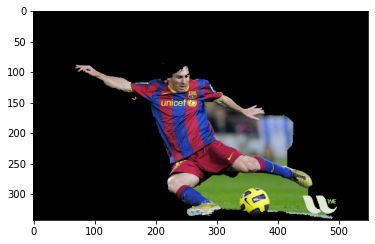

In [74]:
img = cv2.imread('inputs/messi5.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, 450, 290)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
img = img * mask[:, :, np.newaxis]

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

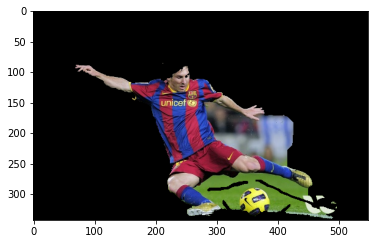

In [75]:
# newmask is manually labelled
newmask = cv2.imread('inputs/newmask.png', 0)
mask[newmask==127] = 0
mask[newmask==255] = 1

mask, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
img = img * mask[:, :, np.newaxis]

plt.imshow(img)
plt.show()

### assignment
Create a interactive application of GrabCut algorithm

In [26]:
img = cv2.imread('inputs/messi5.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
img_origin = img.copy()

drawing = False  # true if mouse is pressed
ix, iy = -1, -1
param = {"thickness": 3, "color": (255, 255, 255)}
initFlag = True


def nothing(x):
    pass


def draw_rec(event, x, y, flags, param):
    global ix, iy, drawing, initFlag, img, img_origin, mask, bgdModel, fgdModel
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            img = img_origin.copy()
            cv2.rectangle(img, (ix, iy), (x, y), (255, 255, 255), thickness=param["thickness"])

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        initFlag = False
        
        img = img_origin.copy()
        rect = (ix, iy, x, y)
        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
        mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
        img = img * mask[:, :, np.newaxis]


def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, img, img_origin, mask, bgdModel, fgdModel
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, (ix, iy),  (x, y), param["color"], param["thickness"])
            cv2.line(mask, (ix, iy), (x, y), 1 if param["color"][0] == 255 else 0, param["thickness"])
            ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(img, (ix, iy),  (x, y), param["color"], param["thickness"])
        cv2.line(mask, (ix, iy), (x, y), 1 if param["color"][0] == 255 else 0, param["thickness"])


# Create a black image, a window
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle if initFlag is False else draw_rec, param)

# create trackbars
cv2.createTrackbar('thickness', 'image', 1, 10, nothing)

while(1):
    cv2.startWindowThread()  # This line is not needed when you execute from terminal.
    cv2.imshow('image', img)
    
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    if key == ord('b'):
        param["color"] = (0, 0, 0)
    if key == ord('w'):
        param["color"] = (255, 255, 255)
        
    if key == ord('a') and initFlag is False:
        img = img_origin.copy()
        mask, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)
        mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
        img = img * mask[:, :, np.newaxis]
        print('evoked')
        
        
    # get current positions of four trackbars
    thickness = cv2.getTrackbarPos('thickness', 'image')
    
    # update param from trackbar
    param["thickness"] = thickness
    cv2.setMouseCallback('image', draw_circle if initFlag is False else draw_rec, param)
    

cv2.waitKey(1)  # This line is not needed when you execute from terminal.
cv2.destroyAllWindows()
cv2.waitKey(1)  # This line is not needed when you execute from terminal.

evoked
evoked
evoked


-1